In [1]:
import cirq
from cirq.contrib.svg import SVGCircuit

# DCM 26

In this notebook, we will go through a simplified example of how quantum computers can provide an advantage in cryptography. <br>
Assume that Alice wants to send to Bob a secret binary string $s = s_0 \ldots s_{n-1}$ but she know that inbetween them Charlie is ready to intercept the message.<br>
One way she can protect the secret string is by encoding it into a binary function $f_s$:<br><br>
$f_s(x) = s.x = s_0x_0 \oplus \ldots \oplus s_{n-1}x_{n-1}$<br><br>
Where $x=x_{0} \ldots x_{n-1}$ is also a binary string and the "." and "$\oplus$" operations are defined by:
| a | b |a.b|
|---|---|:---:|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

And:

| a | b |a $\oplus$ b|
|---|---|:----------:|
| 0 | 0 |      0     |
| 0 | 1 |      1     |
| 1 | 0 |      1     |
| 1 | 1 |      0     |

For example, imagine that Alice wants to send the string "$s = 101$" to Bob, then she would encodes this into the function $f_s$ with the following behaviour:
| x |$f_s$(x) |
|---|:---:|
|000|  0  |
|001|  1  |
|010|  0  |
|011|  1  |
|100|  1  |
|101|  0  |
|110|  1  |
|111|  0  |

Let's check some of these lines:<br>
$f_s(000) = 1.0 \oplus 0.0 \oplus 1.0 = 0 \oplus 0 \oplus 0 = 0 \oplus 0 = 0$<br>
$f_s(101) = 1.1 \oplus 0.0 \oplus 1.1 = 1 \oplus 0 \oplus 1 = 1 \oplus 1 = 0$<br>
$f_s(100) = 1.1 \oplus 0.0 \oplus 1.0 = 1 \oplus 0 \oplus 0 = 1 \oplus 0 = 1$<br>

In fact, if Charlie wanted to find the secret string, he would need to test different inputs and note the corresponding output. Classically, the most efficient scheme requires Charlie to test:<br>
$f_s(100) = 1$<br>
$f_s(010) = 0$<br>
$f_s(001) = 1$<br>
To find that the secret string is indeed "101".<br>
In general, if the length of the string is $n$, Charlie would need to test $n$ different inputs. This is fine as long as $n$ is not too large.<br>
So if $n$ is large enough, it will take a long time for Charlie to decode the secret string but this will also be the case for Bob which is not ideal.

### Bernstein-Vazirani Algorithm
In contrast, if Alice and Bob were the only persons in the world to possess a quantum computer they could use the Bernstein-Vazirani algorithm to encode and quickly decode the secret string.<br>
As a reminder, Alice would need to encode the string into this black box quantum circuit:<br>
![alt text](images/image.png)<br>
And hand it to Bob. Bob would then plug this black box into the following quantum circuit:<br>
![alt text](images/image-1.png)<br>
And by performing only one measurement, he'd be able to read the secret string: "101".

### Task
For this exercise, you will encode "DCM26" using Morse code.<br>
![alt text](images/morse.png)<br>
Each character will then be translated into a binary string over 10 bits which will be transmitted to a third party and decoded thanks to the B-V algo. <br>
For the Morse code to binary string, please use the following scheme:<br>
|Morse|Binary|
|:---:|:----:|
|  .  |  10  |
|  _  |  11  |
|     |  00  |

For example:<br>
|character|Morse|  Binary  |
|:-------:|:---:|:--------:|
|    F    | ..-.|1010111000|
|    5    |.....|1010101010|

## Designing the quantum circuits
Now encode each character of "DCM26" into its own Bernstein-Vazirani circuit: 

### Circuit for D

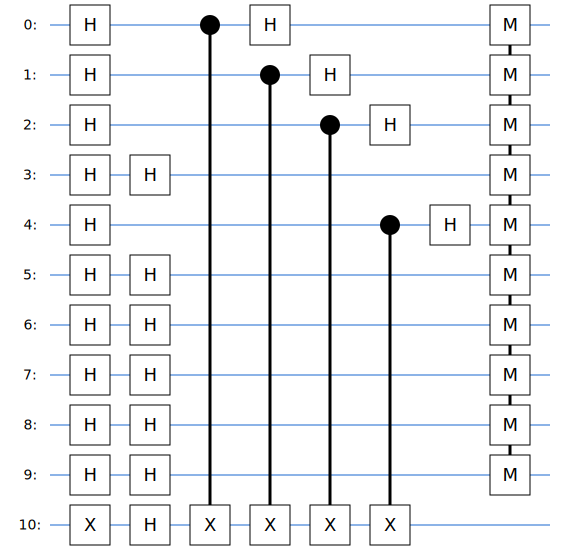

In [2]:
qubits = cirq.LineQubit.range(11)

circuit_d = cirq.Circuit(
    [
        cirq.X(qubits[10]),
        cirq.H.on_each(qubits),
        cirq.CX(qubits[0], qubits[10]),
        cirq.CX(qubits[1], qubits[10]),
        cirq.CX(qubits[2], qubits[10]),
        cirq.CX(qubits[4], qubits[10]),
        cirq.H.on_each(qubits[:10]),
        cirq.measure(*qubits[:10]),
    ]
)
SVGCircuit(circuit_d)

### Circuit for C

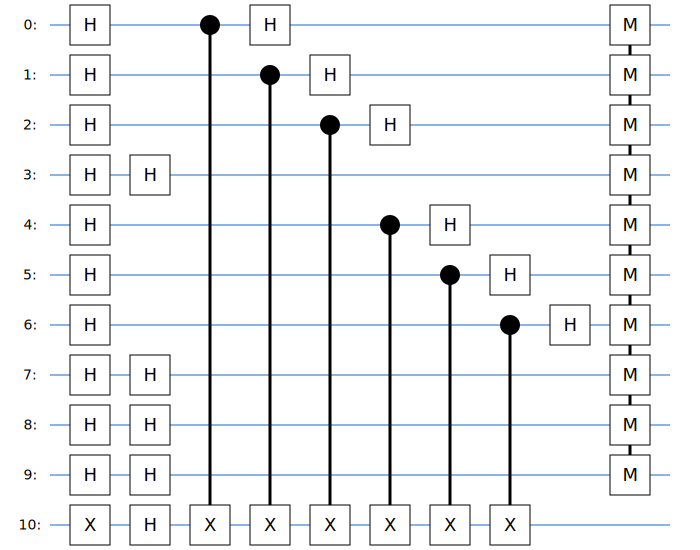

In [3]:
circuit_c = cirq.Circuit(
    [
        cirq.X(qubits[10]),
        cirq.H.on_each(qubits),
        cirq.CX(qubits[0], qubits[10]),
        cirq.CX(qubits[1], qubits[10]),
        cirq.CX(qubits[2], qubits[10]),
        cirq.CX(qubits[4], qubits[10]),
        cirq.CX(qubits[5], qubits[10]),
        cirq.CX(qubits[6], qubits[10]),
        cirq.H.on_each(qubits[:10]),
        cirq.measure(*qubits[:10]),
    ]
)
SVGCircuit(circuit_c)

### Circuit for M

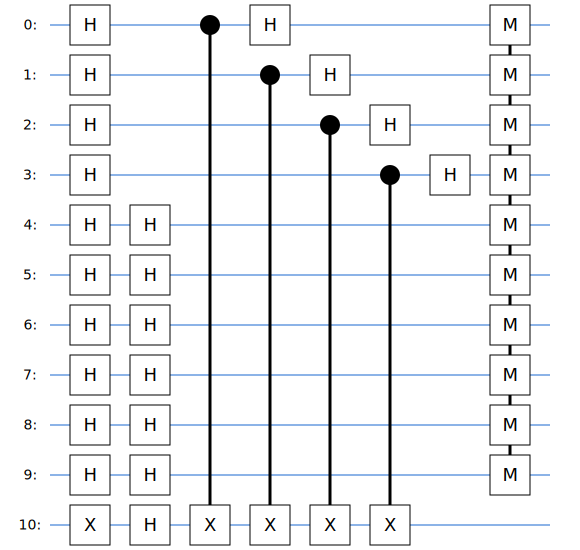

In [4]:
circuit_m = cirq.Circuit(
    [
        cirq.X(qubits[10]),
        cirq.H.on_each(qubits),
        cirq.CX(qubits[0], qubits[10]),
        cirq.CX(qubits[1], qubits[10]),
        cirq.CX(qubits[2], qubits[10]),
        cirq.CX(qubits[3], qubits[10]),
        cirq.H.on_each(qubits[:10]),
        cirq.measure(*qubits[:10]),
    ]
)
SVGCircuit(circuit_m)

### Circuit for 2

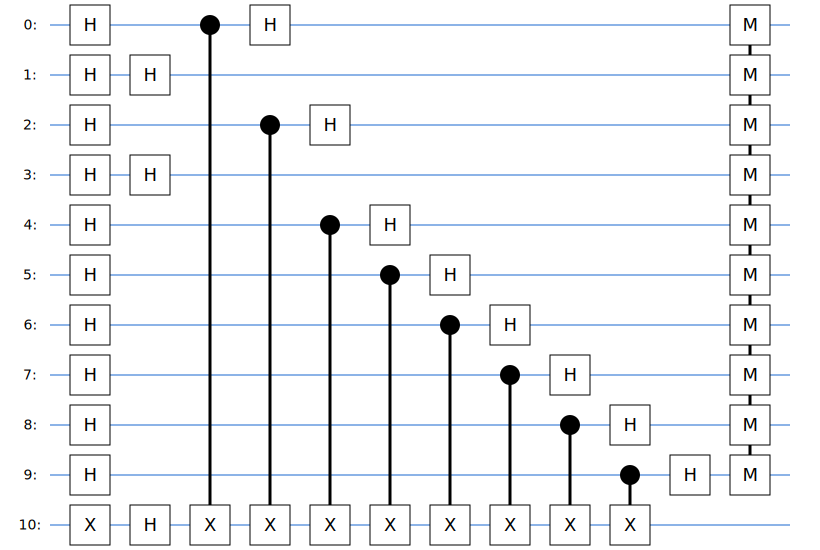

In [5]:
circuit_2 = cirq.Circuit(
    [
        cirq.X(qubits[10]),
        cirq.H.on_each(qubits),
        cirq.CX(qubits[0], qubits[10]),
        cirq.CX(qubits[2], qubits[10]),
        cirq.CX(qubits[4], qubits[10]),
        cirq.CX(qubits[5], qubits[10]),
        cirq.CX(qubits[6], qubits[10]),
        cirq.CX(qubits[7], qubits[10]),
        cirq.CX(qubits[8], qubits[10]),
        cirq.CX(qubits[9], qubits[10]),
        cirq.H.on_each(qubits[:10]),
        cirq.measure(*qubits[:10]),
    ]
)
SVGCircuit(circuit_2)

### Circuit for 6

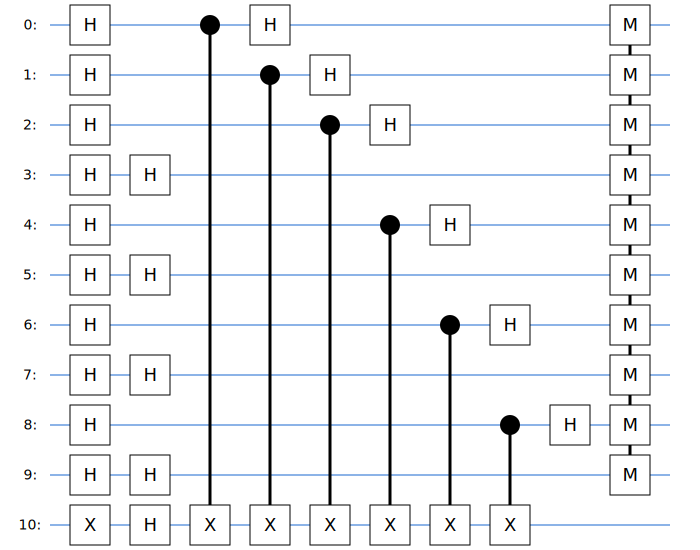

In [6]:
circuit_6 = cirq.Circuit(
    [
        cirq.X(qubits[10]),
        cirq.H.on_each(qubits),
        cirq.CX(qubits[0], qubits[10]),
        cirq.CX(qubits[1], qubits[10]),
        cirq.CX(qubits[2], qubits[10]),
        cirq.CX(qubits[4], qubits[10]),
        cirq.CX(qubits[6], qubits[10]),
        cirq.CX(qubits[8], qubits[10]),
        cirq.H.on_each(qubits[:10]),
        cirq.measure(*qubits[:10]),
    ]
)
SVGCircuit(circuit_6)

## Mapping to the SQALE hardware

The qubits in SQALE are not placed on parallel lines but rather on a square lattice. This affects the connections map where each qubit is only connected to its 4 nearest neighbours. In order to run the previous cricuits on SQALE, you will have to reroute each CX gates to take into account this constraint.<br>
For example, assume you want to apply a CX gate between the qubits 0 and 8 in the following grid:<br>
![alt text](images/grid.png)<br>
Given the grid connectivity, you will have to route this connection through some intermediate qubits. For example:<br>
![alt text](images/routing.png)<br>
You can (and most certainly will) reorder some qubits to fit the topology. 

### Rerouting the circuit for D
One possible way of rerouting the circuit for F is the following (it is not the most efficient):<br>
![alt text](images/d_routing.png)